# superviced learning

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as nm
from sklearn import linear_model as lm

df = pd.read_csv("homeprices.csv")
print(df)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


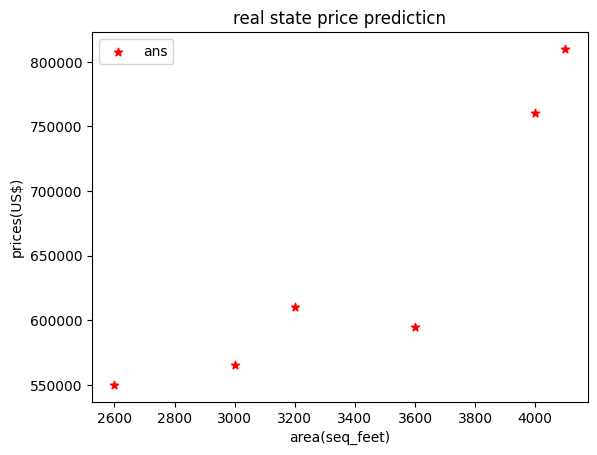

In [41]:
%matplotlib inline
plt.title("real state price predicticn")
plt.scatter(df.area,df.price,label='ans',color='red',marker='*')
plt.xlabel('area(seq_feet)')
plt.ylabel('prices(US$)')
plt.legend()
#plt.plot(df.area,reg.predict(df[['area']]),color='blue')

# linear regression

In [3]:

reg= lm.LinearRegression()
reg.fit(df[['area']],df.price)



LinearRegression()

In [4]:
reg.predict([[3300]])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628813.88621022])

In [5]:
#y=m*x+b
print(reg.coef_)

print(reg.intercept_)

167.30954677*3300+76692.38187078107

[167.30954677]
76692.38187078107


628813.8862117811

## prediction after train

In [6]:
a=pd.read_csv('abc.csv')
p=reg.predict(a)
a["price"]=p
print(a)
print(p)

   area          price
0  2600  511697.203472
1  3000  578621.022179
2  3200  612082.931533
3  3600  679006.750241
4  4000  745930.568949
5  4100  762661.523626
[511697.20347155 578621.02217936 612082.93153327 679006.75024108
 745930.56894889 762661.52362584]


In [7]:
a.to_csv("prediction.csv",index=False)

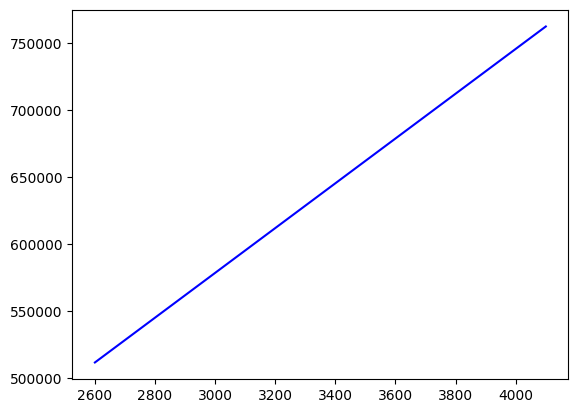

In [8]:
plt.plot(a.area,p,color='blue')

In [9]:
a=pd.read_csv("homeprices2.csv")
print(a)
a.bedrooms=a.bedrooms.fillna(3.0)
a

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [10]:
d=lm.LinearRegression()
d.fit(a[['area','bedrooms','age']],a.price)
d.predict([[3500,4,35]])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([580471.76640927])

## pickel,joblib

In [11]:
import pickle
with open('model_pickel','wb') as f:
    pickle.dump(d,f)
with open('model_pickel','rb') as f:
 ab=   pickle.load(f)

In [12]:
ab.predict([[3500,4,35]])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([580471.76640927])

In [13]:
from joblib import dump, load
dump(d,'model_joblib')
pi=load('model_joblib')
pi.predict([[3500,4,35]])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([580471.76640927])

## dummy variable& one hot encoding

In [43]:
# method 1 dummy variable
from sklearn import linear_model as model
import pandas as pd
dm=pd.read_csv('carprices.csv')
dum=pd.get_dummies(dm['Car Model'])
print(dm)
merg =pd.concat([dm,dum],axis='columns')
print(merg)
abc=merg.drop(['Car Model','Mercedez Benz C class','Sell Price($)'],axis='columns')
abc

x = abc
y = dm['Sell Price($)']
car=model.LinearRegression()
car.fit(x,y)
print(car.predict([[45000,4,0,0]]))
car.score(x,y)

                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5
                Car Model  Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5  \
0                  BMW X5    69000          18000         6        0       1   


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9417050937281083

In [15]:
# method 2 label encoder    --half code ON ONEHOT--
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model as model
import pandas as pd
dm=pd.read_csv('carprices.csv')
print(dm)

le=LabelEncoder()
dm['Car Model']=le.fit_transform(dm['Car Model'])
print(dm)


x = dm[['Car Model','Mileage','Age(yrs)']].values
y = dm['Sell Price($)'].values
car=model.LinearRegression()
car.fit(x,y)
print(car.predict([[2,45000,4]]))
car.score(x,y)


                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5
    Car Model  Mileage  Sell Price($)  Age(yrs)
0           1    69000          18000         6
1           1    35000          34000         3
2           1   

0.8719970367825953

In [16]:
ab=pd.read_csv('prediction.csv')
print(ab)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # ,random_state=10) mean model can't use random feture
print(len(x_train))
print(x_train)
print(len(x_test))
a=lm.LinearRegression()
a.fit(x_train,y_train)
a.predict(x_test)
a.score(x_test,y_test)


   area          price
0  2600  511697.203472
1  3000  578621.022179
2  3200  612082.931533
3  3600  679006.750241
4  4000  745930.568949
5  4100  762661.523626
10
[[    2 67000     6]
 [    1 35000     3]
 [    0 91000     8]
 [    1 46000     4]
 [    0 72000     6]
 [    0 52000     5]
 [    2 83000     7]
 [    1 22500     2]
 [    2 59000     5]
 [    0 59000     5]]
3


-0.008122118498374853

## logistic rigression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
a=pd.read_csv('insurance_data.csv')
x_train,x_test,y_train,y_test= train_test_split(a[['age']],a.bought_insurance,test_size=0.2)
print(x_train.head(5))
a=LogisticRegression()
a.fit(x_train,y_train)
print(a.predict(x_test))
print(a.score(x_test,y_test))
print(a.predict_proba(x_test))



    age
9    61
13   29
7    60
6    55
2    47
[0 0 0 1 1 1]
0.8333333333333334
[[0.93436548 0.06563452]
 [0.94338849 0.05661151]
 [0.95804375 0.04195625]
 [0.27553178 0.72446822]
 [0.08438277 0.91561723]
 [0.41660285 0.58339715]]


In [18]:
print(a.predict([[55]])) #  buy insurance
print(a.predict([[25]])) #  not buy insurance

[1]
[0]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[5]
5
0.9555555555555556


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 640x480 with 0 Axes>

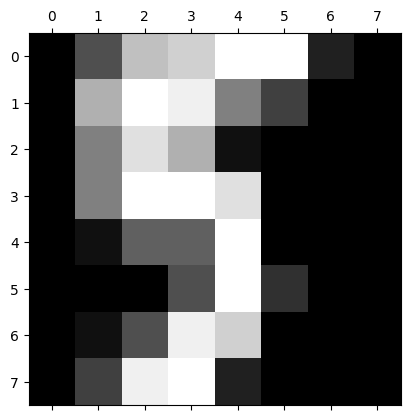

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
a=load_digits()
dir(a)
b=a.images
plt.gray()
plt.matshow(b[15])
x_train,x_test,y_train,y_test=train_test_split(a.data,a.target,test_size=0.2)
c = LogisticRegression()
c.fit(x_train,y_train)
print(c.predict(a.data[[15]]))

print(a.target[15])
print(c.score(x_test,y_test))



In [20]:
from sklearn.metrics import confusion_matrix
d=c.predict(x_test)
confusion_matrix(d,y_test)

array([[40,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  1,  0,  0,  0,  3,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  1,  0, 26,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 36]])

## decision tree

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split

a=pd.read_csv('salaries.csv')
b=LabelEncoder()
a['company']=b.fit_transform(a['company'])
a['job']=b.fit_transform(a['job'])
a['degree']=b.fit_transform(a['degree'])

b=a.drop(['salary_more_then_100k'],axis='columns')
x=b
y=a['salary_more_then_100k']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
c=tree.DecisionTreeClassifier()
c.fit(x_train,y_train)
print(c.predict([[2,2,3]]))
print(c.score(x_test,y_test))
print(x_train)



[1]
0.5
    company  job  degree
4         2    1       0
13        1    0       1
10        1    2       0
2         2    0       0
5         2    1       1
15        1    1       1
11        1    2       1
12        1    0       0
3         2    0       1
0         2    2       0
7         0    1       0
8         0    0       0


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## support vector machine

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
[1 0 0 0 2 1 1 2 2 1 0 1 1 0 0 0 2 2 2 2 0 2 2 1 0 0 1 1 2 0 2 2 1 0 0 2 1
 0 2 2 0 0 0 2 1 0 1 0 2 2 0 2 0 2 2 1 2 2 0 1 2 1 1 2 2 2 1 1 1 0 0 0 0 1
 0 2 1 1 0 2 2 1 2 2 0 1 1 0 1 2 2 0 0 0 2 2 2 2 2 1 1 1 0 2 1 1 0 2 0 0 0
 1 1 0 2 2 1 1 0 1]
0.95


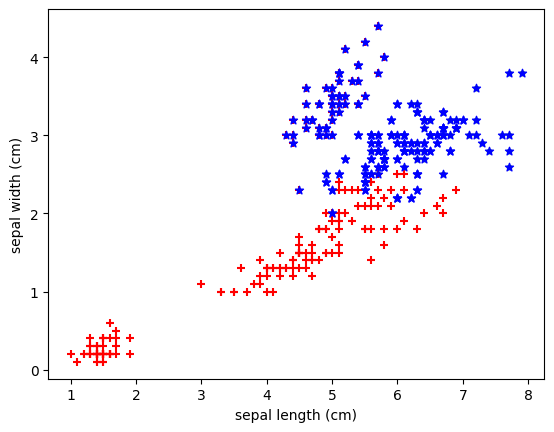

In [22]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

iris=load_iris()
print(dir(iris))


df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
#df[df.target==2]
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
# sepal le,we
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
#second method
      
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],color='red',marker='+')
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],color='blue',marker='*')


x=df.drop(['target','flower_name'],axis='columns')
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

a=SVC(gamma='scale') # ,kernel='linear'
a.fit(x_train,y_train)
b=print(a.predict(x_test))
print(a.score(x_test,y_test))


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
a.predict(x_test)

array([0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2,
       2, 2, 0, 1, 1, 0, 2, 0])

## random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

digit = load_digits()
dir(digit)

df = pd.DataFrame(digit.data)

#df['target']= digit.target
#df['target_names']=df.target.apply(lambda x : digit.target_names[x])
#plt.gray()
#for i in range(2):
#    plt.matshow(digit.images[i])

#x= df.drop(['target','target_names'],axis='columns')
#y = df.target

x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,test_size=0.2)
rm=RandomForestClassifier(n_estimators=50)
rm.fit(x_train,y_train)
b=rm.predict(x_test)
a=rm.score(x_test,y_test)
print(a)
print(b)


0.9638888888888889
[3 7 3 3 1 8 6 9 2 4 4 6 0 3 1 7 5 4 9 0 0 1 1 0 6 2 5 3 8 2 4 0 9 7 0 0 8
 3 3 3 3 5 2 1 8 6 0 6 0 3 0 8 7 9 9 1 9 0 6 8 5 6 1 5 4 6 7 7 4 0 5 6 8 0
 9 2 8 9 0 6 8 1 8 6 0 7 2 4 0 2 2 4 4 6 3 2 9 5 5 1 3 0 7 2 7 4 1 6 2 0 9
 9 4 4 4 7 7 9 7 4 7 3 8 9 1 5 4 8 9 6 3 4 2 3 3 9 9 7 0 6 8 2 7 3 2 2 5 7
 2 1 7 9 3 4 2 6 6 4 2 0 8 7 7 7 6 6 9 4 9 1 6 4 6 6 9 1 3 8 1 9 4 3 4 9 8
 2 9 4 5 8 8 6 4 2 3 0 3 0 5 2 4 8 5 7 7 8 9 7 7 5 1 1 7 2 8 8 4 8 9 1 1 9
 6 0 9 4 4 4 8 3 9 5 6 5 7 3 7 6 0 4 5 2 5 6 8 0 2 6 1 7 7 4 2 6 8 4 5 9 3
 2 6 4 0 1 4 3 2 9 6 6 4 7 2 6 8 2 9 8 2 7 7 3 5 3 2 9 9 4 8 6 6 3 5 5 4 2
 1 4 6 3 4 3 3 5 8 8 9 2 6 0 7 7 5 7 2 4 9 0 2 0 5 1 3 0 5 1 1 5 2 5 3 2 0
 8 2 7 3 6 8 3 5 5 4 9 1 7 3 3 3 9 3 5 0 7 5 4 3 2 1 9]


Text(95.72222222222221, 0.5, 'Truth')

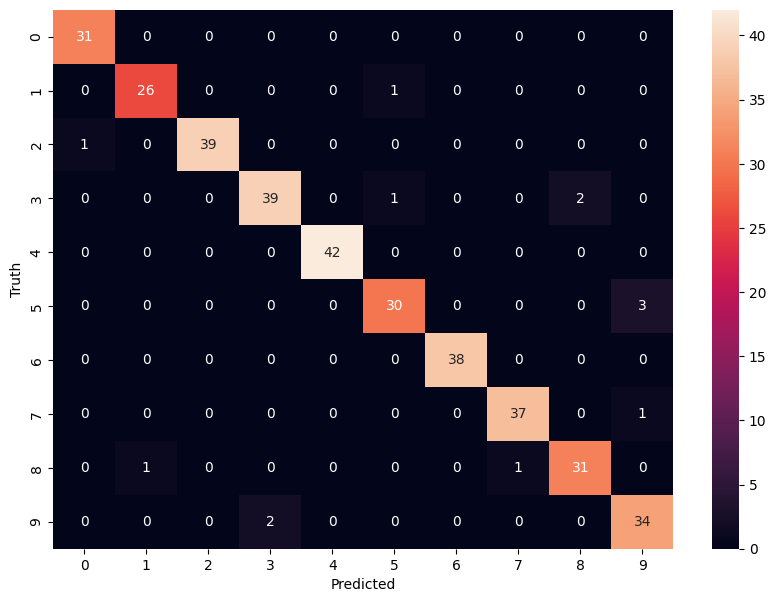

In [25]:
c=confusion_matrix(y_test,b)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap( c, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## k fold cross validation & hypar tuning gridserchcv and rendomserchcv

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as nm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digit= load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,test_size=0.3)

lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

def score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

print(score(LogisticRegression(),x_train,x_test,y_train,y_test))
print(score(SVC(),x_train,x_test,y_train,y_test))
print(score(RandomForestClassifier(),x_train,x_test,y_train,y_test))

#from sklearn.model_selection import KFold
#kf=KFold(n_splits=3)
#for train_data,test_data in kf.split([1,2,3,4,5,6,7,8,9]):
#    print(train_data,test_data)

#best example on iris dataset because divied flower name wise and kfold not ,so use strificedKfold , cross val use defalt strificedKfold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris=load_iris()
lr1=cross_val_score(LogisticRegression(),iris.data,iris.target,cv=5) # cv mean n_splite in cross val, defalt cv=3
sv1=cross_val_score(SVC(),iris.data,iris.target,cv=5)
rf1=cross_val_score(RandomForestClassifier(n_estimators=50),iris.data,iris.target,cv=5)
print(lr1)
print(sv1)
print(rf1)
print(nm.average(lr1))
print(nm.average(sv1))
print(nm.average(rf1))




/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.9518518518518518
0.9796296296296296
0.9648148148148148


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.96666667 1.         0.93333333 0.96666667 1.        ]
[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9733333333333334
0.9666666666666666
0.9666666666666668


In [2]:
#find best perameter for model
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='auto'),{
        'C':[1,10,20],
        'kernel':['rbf','linear']
        },cv=5,return_train_score=False)
clf.fit(iris.data,iris.target)
print(clf.cv_results_)
df1=pd.DataFrame(clf.cv_results_)
gsc=df1[['param_C','param_kernel','mean_test_score']]
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)
print(clf.score(iris.data,iris.target))


#random search cv(get rendom perameter,use when data is large and computer power is low)
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(SVC(gamma='auto'),{
        'C':[1,10,20],
        'kernel':['rbf','linear']
        },cv=5,return_train_score=False,n_iter=2) # n_iter mean how many time rendomly select perameter
rs.fit(iris.data,iris.target)
print(rs.cv_results_)
df2=pd.DataFrame(rs.cv_results_)
rsc=df2[['param_C','param_kernel','mean_test_score']]
print(rs.best_score_)
print(rs.best_params_)
print(rs.best_estimator_)
print(rs.score(iris.data,iris.target))


{'mean_fit_time': array([0.00140944, 0.00070353, 0.00081291, 0.00072975, 0.00075665,
       0.00067272]), 'std_fit_time': array([6.33180257e-04, 3.64605544e-05, 6.73927301e-05, 5.68939670e-05,
       1.69371861e-05, 1.34452860e-05]), 'mean_score_time': array([0.00073071, 0.00050116, 0.00057402, 0.0004734 , 0.00051622,
       0.00047364]), 'std_score_time': array([1.17660127e-04, 4.71263739e-05, 4.82868201e-05, 1.15080872e-05,
       2.87684990e-05, 1.80768457e-05]), 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 20, 'kernel': 'rbf'}, {'C': 20, 

In [3]:

gsc=df1[['param_C','param_kernel','mean_test_score']]
rsc=df2[['param_C','param_kernel','mean_test_score']] # find for 2 sample because n_iter=2
print(gsc)
print(rsc)

  param_C param_kernel  mean_test_score
0       1          rbf         0.980000
1       1       linear         0.980000
2      10          rbf         0.980000
3      10       linear         0.973333
4      20          rbf         0.966667
5      20       linear         0.966667
  param_C param_kernel  mean_test_score
0       1       linear         0.980000
1      20       linear         0.966667


# navies bays algo 1

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd

a=pd.read_csv('titanic.csv')
b=a.drop(['PassengerId','Name','Pclass','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

x=b.drop('Survived',axis='columns')
y=a.Survived

dumm=pd.get_dummies(x.Sex)
x1=pd.concat([x,dumm],axis='columns')
x2=x1.drop('Sex',axis='columns')
x2['Age']=x2.Age.fillna(x2.Age.mean())

x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2)
model=GaussianNB()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
print(model.predict(x_test[:10]))
print(model.predict_proba(x_test[:10]))


0.7262569832402235
[1 1 1 1 0 0 0 0 0 1]
[[1.05341213e-02 9.89465879e-01]
 [4.18651198e-06 9.99995813e-01]
 [1.79220648e-02 9.82077935e-01]
 [1.42194949e-02 9.85780505e-01]
 [9.83856341e-01 1.61436589e-02]
 [9.82411071e-01 1.75889287e-02]
 [9.84536132e-01 1.54638684e-02]
 [9.85150619e-01 1.48493810e-02]
 [9.85282580e-01 1.47174200e-02]
 [9.50699672e-03 9.90493003e-01]]


# navies byes algo 2

In [30]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

a=pd.read_csv('spam.csv')
a['Category']=a.Category.apply(lambda x:1 if x=='spam' else 0)


#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(a.Message)
##print(X.toarray())
#
#
#x_train,x_test,y_train,y_test=train_test_split(x,a.Category,test_size=0.2)
#model=MultinomialNB()
#model.fit(x_train,y_train)
#print(model.score(x_test,y_test))
#print(model.predict(x_test[:10]))
#print(model.predict_proba(x_test[:10]))

spam=[
    "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
    "Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!"
]
#abc=vectorizer.transform(spam)
#print(model.predict(abc))

x_train,x_test,y_train,y_test=train_test_split(a.Message,a.Category,test_size=0.2)
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
print(clf.predict(x_test[:10]))
print(clf.predict(spam))



0.9874439461883409
[0 0 1 0 0 0 0 0 0 1]
[0 1]


## l1(lasso) & l2(ridge) regulization(overfitting to balanced fitting)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

a=pd.read_csv('titanic.csv') # data set are wrong for lasso and ridge but used

a.isna().sum()
#a.dropna(inplace=True) # drop all row which have nan value

a['Cabin']=a.Cabin.fillna(0)
a.fillna(a.Age.mean(),inplace=True)
a.isna().sum()
a.head(100)

dum=pd.get_dummies(a,drop_first=True) # drop_first=True drop first column of each dumm variable(index)
x=dum.drop('Survived',axis='columns')
y=dum.Survived

lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))  # score is not good because data is not linear so use lasso and ridge

import sklearn.linear_model as lm
lasso=lm.Lasso(alpha=50, max_iter=100, tol=0.1)
ridge=lm.Ridge(alpha=50, max_iter=100, tol=0.1)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)
print(lasso.score(x_test,y_test))    # score is good because dataset wrong
print(ridge.score(x_test,y_test))    # score is good because dataset wrong

0.41697214621429135
-0.004714319916307108
0.39088488880729166


# unsuperviced learning

## k mean clustring

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


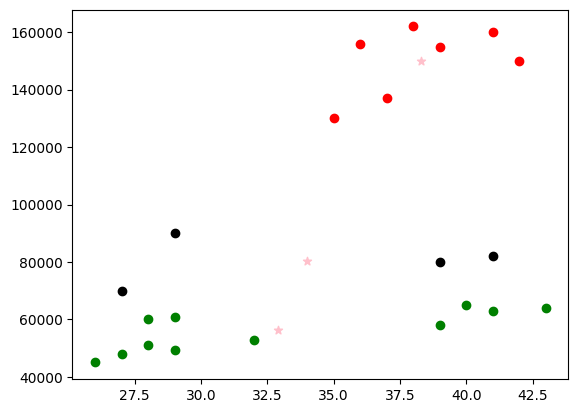

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pylab as plt

a= pd.read_csv('income.csv')

#plt.scatter(a.Age,a['Income($)'])

b=KMeans(n_clusters=3)
c=b.fit_predict(a[['Age','Income($)']])
a['cluster']=c
clust= b.cluster_centers_

df0=a[a.cluster==0]
df1=a[a.cluster==1]
df2=a[a.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='black')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(clust[:,0],clust[:,1],marker='*',color='pink',label='centroid')

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

Text(0.5, 1.0, 'Elbow Method For Optimal k')

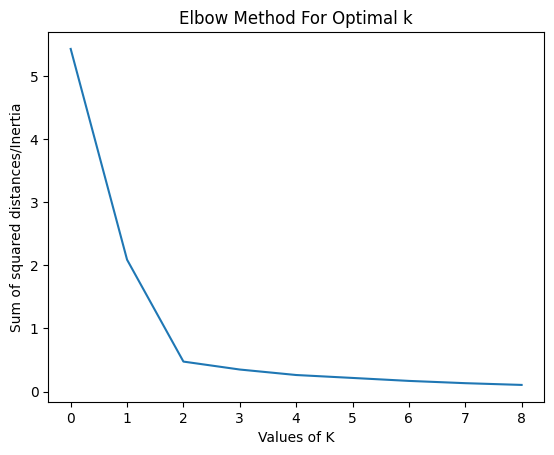

In [33]:
#scale dataset values
scaler= MinMaxScaler()
scaler.fit(a[['Age']])
a['Age']=scaler.transform(a[['Age']])
scaler.fit(a[['Income($)']])
a['Income($)']=scaler.transform(a[['Income($)']])

d=KMeans(n_clusters=3)
aftscaler=d.fit_predict(a[['Age','Income($)']])
a['cluster']=aftscaler
clust2=d.cluster_centers_

#df0=a[a.cluster==0]
#df1=a[a.cluster==1]
#df2=a[a.cluster==2]
#
#plt.scatter(df0.Age,df0['Income($)'],color='red')
#plt.scatter(df1.Age,df1['Income($)'],color='black')
#plt.scatter(df2.Age,df2['Income($)'],color='green')
#plt.scatter(clust2[:,0],clust2[:,1],marker='*',color='pink',label='centroid')


#Elbow Method For Optimal k
soe = []
for cluster in range(1,10) :
 kmeans = KMeans(n_clusters=cluster)
 kmeans.fit(a[['Age','Income($)']])
 soe.append(kmeans.inertia_)

plt.plot(soe)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')

## k-nearest neighbors(knn)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris
iri=load_iris()
dir(iri)
x_train,x_test,y_train,y_test=train_test_split(iri.data,iri.target,test_size=0.2)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
y_pre=knn.predict(x_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## pca(principal componant ratio) use to reduce unused feture

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digit=load_digits()
a= pd.DataFrame(digit.data,columns=digit.feature_names)
a.describe()

x=digit.data
y=digit.target
x.shape

b=StandardScaler()
c=b.fit_transform(digit.data)
c.shape


pca=PCA(n_components=64) # max component is 64 in image data arry
e=x_train_pca=pca.fit_transform(c)
e.shape

x_train,x_test,y_train,y_test=train_test_split(e,y,test_size=0.2)



from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))


0.9583333333333334


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## bagging

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

a=pd.read_csv('diabetes.csv')
a.isna().sum()
x=a.drop('Outcome',axis='columns')
y=a.Outcome

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print(dt.score(x_test,y_test))

bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg.fit(x_train,y_train)
print(bg.score(x_test,y_test))

0.6948051948051948
0.7597402597402597
